## Telco Customer Churn predicion

Customer churn is percentage of customer that stopped using company's service or product during a certain time frame.

In this project we'll analyze a Kaggle data set which gives us data of a telecommunications company Telcom about users ant wheter they churned or not and build a model that predicts the likelyhood of a customer churn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from helper import ChurnHelper

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.TotalCharges.head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

We note that TotalCharges is of type 'object' although the values are numerical.

In [5]:
df.TotalCharges.replace(" ", np.nan, inplace=True)
df.TotalCharges = df.TotalCharges.astype('float64')

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
helper = ChurnHelper(df)
figsize = (12,5)

# EDA

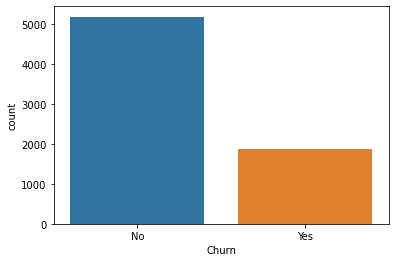

In [9]:
sns.countplot(x=df.Churn)
plt.show()

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


At first glance, it seems that:
- most of the customers are non-senior;
- tenure has no outliers - max is ~2 sdts from the mean, 75th percentile is ~1std from the mean;
- some customers stayed with the company for less that a month (tenure=0);
- there's no significant outliers in MonthlyCharges - max is ~2stds from the mean;
- TotalCharges is skewed to the right (median < mean by ~1/2 std);

### Demographics

gender  Churn
Female  No       0.730791
        Yes      0.269209
Male    No       0.738397
        Yes      0.261603
Name: Churn, dtype: float64


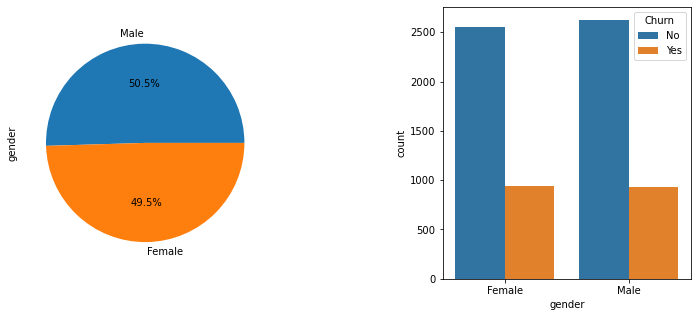

In [11]:
helper.plot_pie_and_count('gender')

In [12]:
helper.get_p_for_chi_sq('gender')

0.48657873605618596

**Observations**:
- Data is equally split for gender;
- Although greater proportion of females churn, the corresponding p-value of the test statistic is $p = 0.486$ so since the p-value is greater than our chosen significance level ($\alpha = 0.05$), we do not reject the $H_0$ (that gender is not associated with churn rate).

**NOTE** - we'll use the same $H_0$ (_{feature}_ is not associated with churn rate) and $\alpha=0.05$ across the whole project.

SeniorCitizen  Churn
0              No       0.763938
               Yes      0.236062
1              No       0.583187
               Yes      0.416813
Name: Churn, dtype: float64


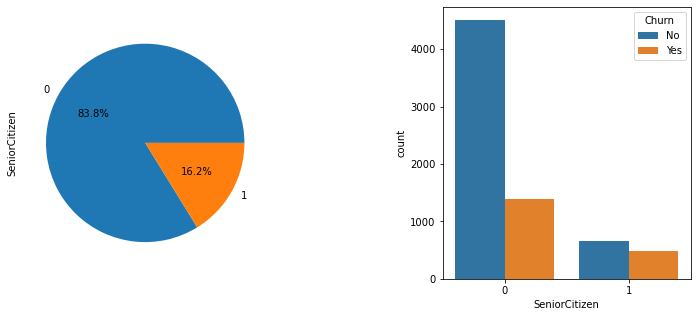

In [13]:
helper.plot_pie_and_count('SeniorCitizen')

In [14]:
helper.get_p_for_chi_sq('SeniorCitizen')

1.510066805092378e-36

**Observations**:
- Most of the customers are non-senior citizens;
- Senior citizens are almost twice more likely to churn than non-senior and p-value of $1.5\cdot10^{-36}$ suggests that the difference is statistically significant;

Partner  Churn
No       No       0.670420
         Yes      0.329580
Yes      No       0.803351
         Yes      0.196649
Name: Churn, dtype: float64


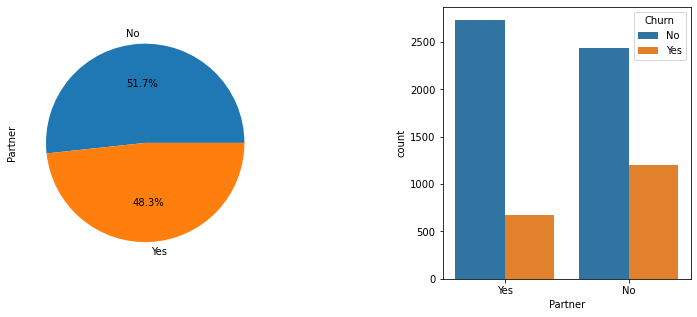

In [15]:
helper.plot_pie_and_count('Partner')

In [16]:
helper.get_p_for_chi_sq('Partner')

2.1399113440759935e-36

**Observations**:
- Our dataset represents people with partner and without almost equally;
- Higher proportion of people without partners will churn and p-value ($2.1\cdot10^{-36}$) suggests that the difference is statistically significant;

Dependents  Churn
No          No       0.687209
            Yes      0.312791
Yes         No       0.845498
            Yes      0.154502
Name: Churn, dtype: float64


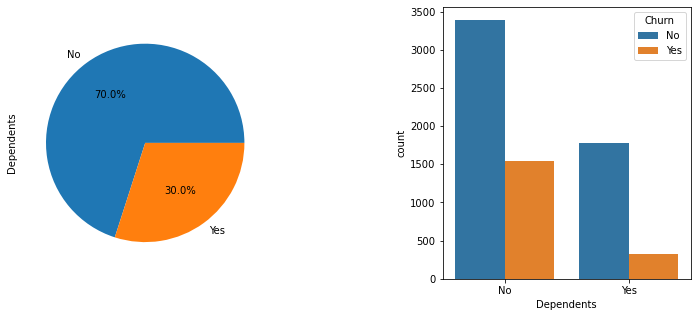

In [17]:
helper.plot_pie_and_count('Dependents')

In [18]:
helper.get_p_for_chi_sq('Dependents')

4.9249216612154196e-43

**Observations**:
- Most of the people in our dataset do not have dependents;
- Higher proportion of people without dependents will churn and p-value ($4.9\cdot^{-43}$) suggests that the difference is statistically significant;

### Account details

In [19]:
df.groupby('Churn').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,0.128721,37.569965,61.265124,2555.344141
Yes,0.254682,17.979133,74.441332,1531.796094


It seems that:
- senior citizens are more likely to churn;
- longer the tenure less likely customer will churn;
- total charges are bigger for customers who do not churn (which agrees with our intuition that longer the customer is with the company more they will pay);

Now let's take a look at the distributions for the numerical values.

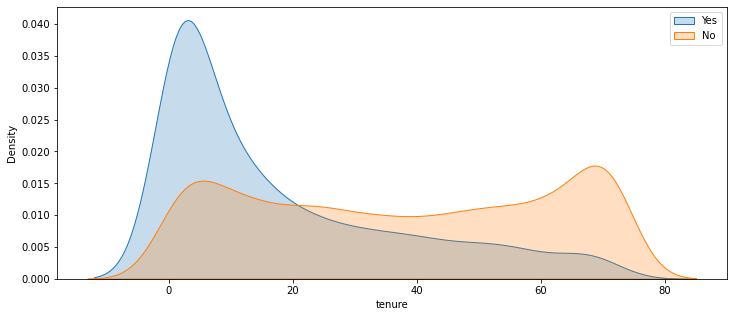

In [20]:
helper.plot_kde('tenure')

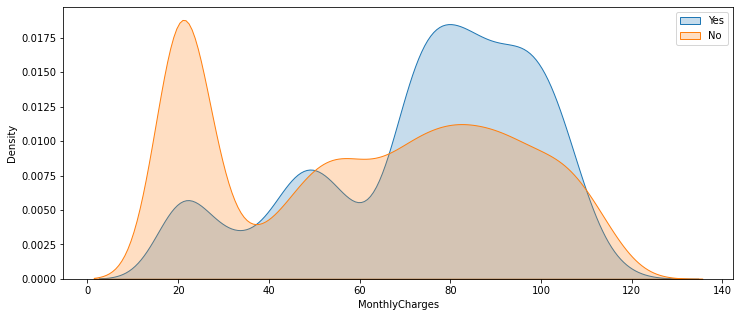

In [21]:
helper.plot_kde('MonthlyCharges')

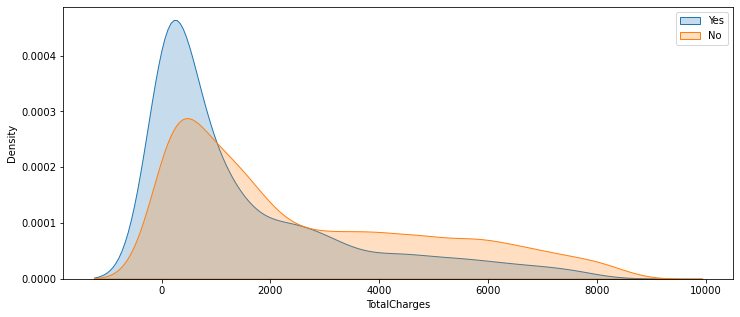

In [22]:
helper.plot_kde('TotalCharges')

**Observations:**
- Longer the customer has stayed with the company, it's less likely they will churn (if customer stays with the company for ~20 months they will most likely not churn);
- Higher the montly charges, more likely customers will churn (customers who pay >~65 USD will most likely churn);
- Higher the total charges, less likely the customer will churn (which is of no surprise since higher total charges most probably mean that customer has been with the company for a longer time, which means they are less likely to churn (see above));

Just in case let's check our assumption stated above that higher the total charges longer the tenure.

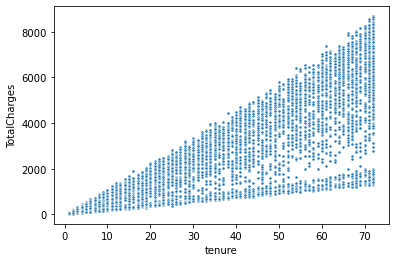

In [23]:
sns.scatterplot(x=df.tenure, y=df.TotalCharges, marker='.')
plt.show()

In [24]:
df.tenure.corr(df.TotalCharges)

0.8258804609332016

We see that the assumption is correct.
Therefore we'll take a better look into tenure and monthly charges, ignoring total charges.

In [25]:
df.tenure.unique().size

73

In [26]:
df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

We see that tenure's value ranges from 0 to 72, which is 0 to 6 years. Let's split tenure into ranges and take a deeper look.

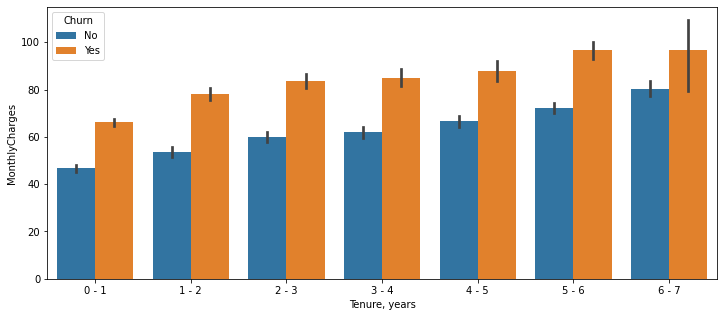

In [27]:
plt.figure(figsize=figsize)
ax = sns.barplot(x=df.tenure//12+0.5, y=df.MonthlyCharges, hue=df.Churn)
ax.set_xticklabels([f'{i} - {i+1}' for i in np.arange(0, 7, 1)])
plt.xlabel('Tenure, years')
plt.show()

We see that proportion of customers who churn increases with monthly charges, regardless of the tenure.

PhoneService  Churn
No            No       0.750733
              Yes      0.249267
Yes           No       0.732904
              Yes      0.267096
Name: Churn, dtype: float64


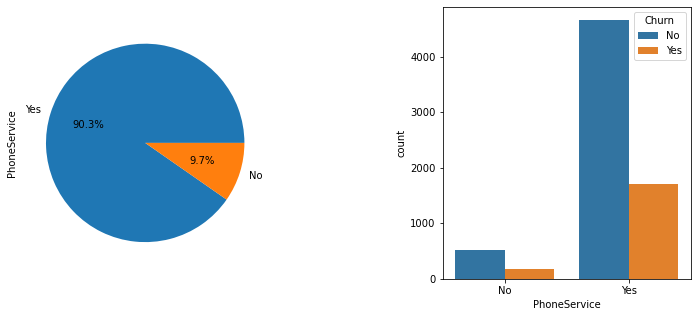

In [28]:
helper.plot_pie_and_count('PhoneService')

In [29]:
helper.get_p_for_chi_sq('PhoneService')

0.3387825358066928

**Observations:**
- Most of the customer have phone service;
- People with phone service are a bit more likely to churn but p-value of 0.34 ( which is > 0.05) suggests that $H_0$ can not be rejected;

MultipleLines     Churn
No                No       0.749558
                  Yes      0.250442
No phone service  No       0.750733
                  Yes      0.249267
Yes               No       0.713901
                  Yes      0.286099
Name: Churn, dtype: float64


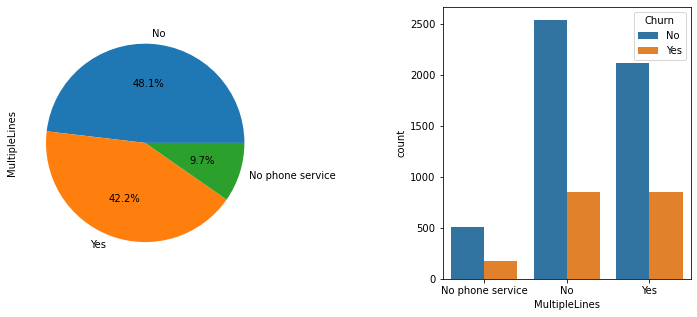

In [30]:
helper.plot_pie_and_count('MultipleLines')

In [31]:
helper.get_p_for_chi_sq('MultipleLines')

0.0034643829548773

**Observations:**
- Most of the customer do not have multiple lines (including those that don't have phone service);
- People with multiple lines are a bit more likely to churn and p-value of 0.0035 suggests that we can reject $H_0$;

InternetService  Churn
DSL              No       0.810409
                 Yes      0.189591
Fiber optic      No       0.581072
                 Yes      0.418928
No               No       0.925950
                 Yes      0.074050
Name: Churn, dtype: float64


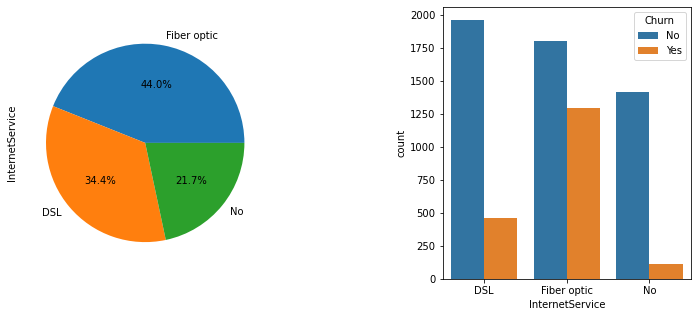

In [32]:
helper.plot_pie_and_count('InternetService')

In [33]:
helper.get_p_for_chi_sq('InternetService')

9.571788222840544e-160

**Observations:**
- Most of the customer have internet service;
- People with fiber optic internet service are most likely to churn, while people without internet service are verly likely not to churn. p-value for these observations is very low ($9.57\cdot10^{-160}$), so we can reject $H_0$ with rather high confidence;

OnlineSecurity       Churn
No                   No       0.582333
                     Yes      0.417667
No internet service  No       0.925950
                     Yes      0.074050
Yes                  No       0.853888
                     Yes      0.146112
Name: Churn, dtype: float64


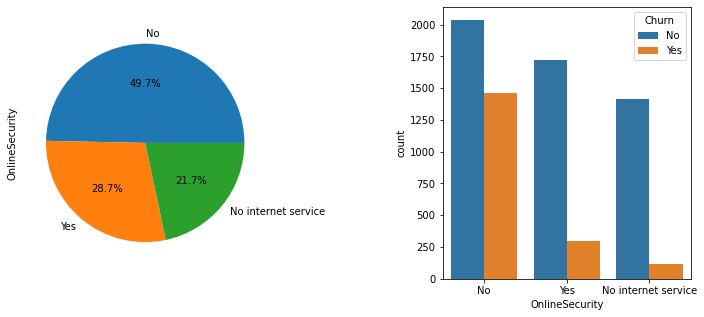

In [34]:
helper.plot_pie_and_count('OnlineSecurity')

In [35]:
helper.get_p_for_chi_sq('OnlineSecurity')

2.6611496351768565e-185

**Observations:**
- Most of the customers do not have online security;
- People with no online security are most likely to churn. p-value for these observations is very low ($2.66\cdot10^{-185}$), so we can reject $H_0$;

OnlineBackup         Churn
No                   No       0.600712
                     Yes      0.399288
No internet service  No       0.925950
                     Yes      0.074050
Yes                  No       0.784685
                     Yes      0.215315
Name: Churn, dtype: float64


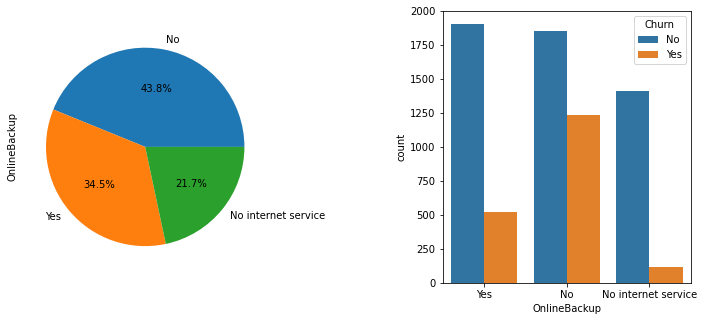

In [36]:
helper.plot_pie_and_count('OnlineBackup')

In [37]:
helper.get_p_for_chi_sq('OnlineBackup')

2.0797592160865457e-131

**Observations:**
- Most of the customers do not have online backup;
- People with no online backup are most likely to churn. p-value for these observations is low ($2.08\cdot10^{-131}$), so we can reject $H_0$;

DeviceProtection     Churn
No                   No       0.608724
                     Yes      0.391276
No internet service  No       0.925950
                     Yes      0.074050
Yes                  No       0.774979
                     Yes      0.225021
Name: Churn, dtype: float64


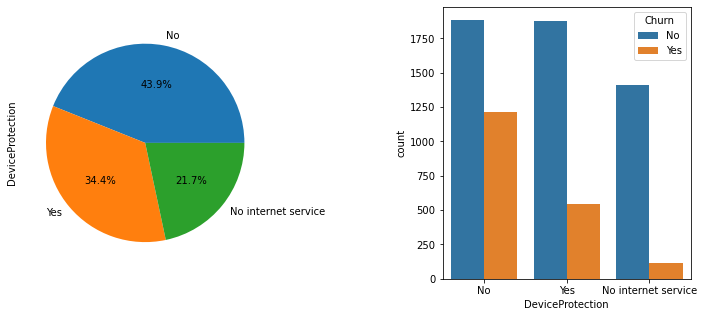

In [38]:
helper.plot_pie_and_count('DeviceProtection')

In [39]:
helper.get_p_for_chi_sq('DeviceProtection')

5.505219496457244e-122

**Observations:**
- Most of the customers do not have device protection;
- People with no device protection are most likely to churn. p-value for these observations is low ($5.05\cdot10^{-122}$), so we can reject $H_0$;

TechSupport          Churn
No                   No       0.583645
                     Yes      0.416355
No internet service  No       0.925950
                     Yes      0.074050
Yes                  No       0.848337
                     Yes      0.151663
Name: Churn, dtype: float64


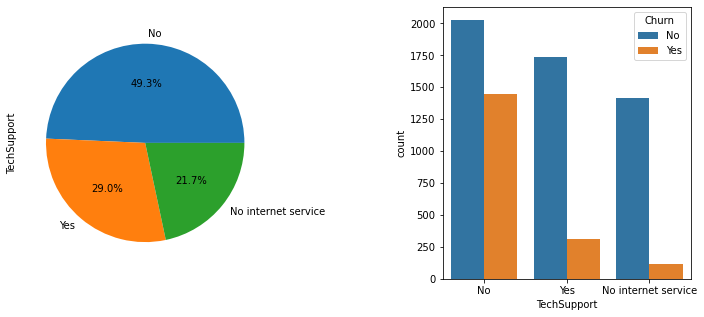

In [40]:
helper.plot_pie_and_count('TechSupport')

In [41]:
helper.get_p_for_chi_sq('TechSupport')

1.4430840279999813e-180

**Observations:**
- Most of the customers do not have technical support;
- People with no technical support are most likely to churn. p-value for these observations is low ($1.44\cdot10^{-180}$), so we can reject $H_0$;

StreamingTV          Churn
No                   No       0.664769
                     Yes      0.335231
No internet service  No       0.925950
                     Yes      0.074050
Yes                  No       0.699298
                     Yes      0.300702
Name: Churn, dtype: float64


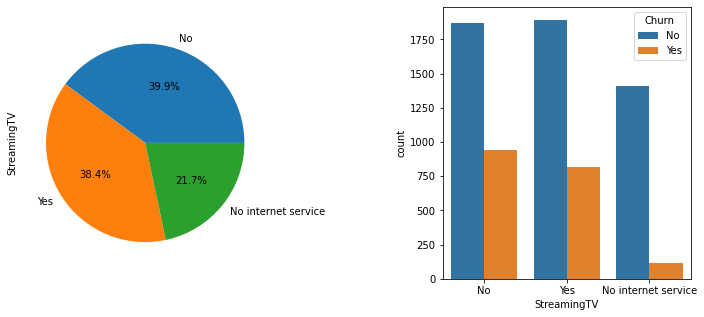

In [42]:
helper.plot_pie_and_count('StreamingTV')

In [43]:
helper.get_p_for_chi_sq('StreamingTV')

5.528994485739024e-82

We'd also like to know whether there's a difference between churn rate for the streaming TV excluding customers who do not have internet service since it seems that in such a case difference is not that big.

In [44]:
helper.get_p_for_chi_sq('StreamingTV', 'No internet service')

0.006457991556469649

**Observations:**
- In totoal, most of the customers do not have streaming TV;
- Among the customers who have internet service almost half have streaming TV;
- In general customers with no streaming TV are most likely to churn;
- In general p-value for the observations is low ($5.54\cdot10^{-82}$), so we can reject $H_0$ with rather high confidence, but when customers without internet service are excluded, p-value is still small enough to reject $H_0$ ($p=0.0065$); 

StreamingMovies      Churn
No                   No       0.663196
                     Yes      0.336804
No internet service  No       0.925950
                     Yes      0.074050
Yes                  No       0.700586
                     Yes      0.299414
Name: Churn, dtype: float64


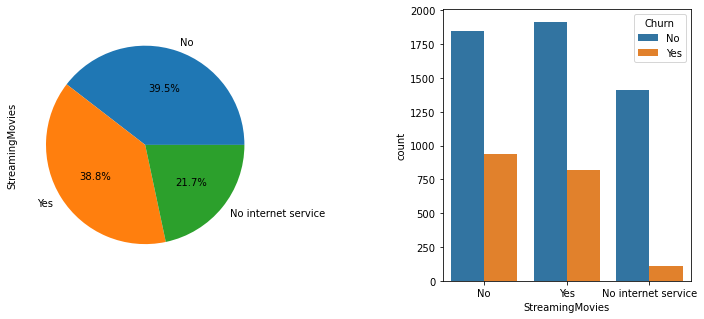

In [45]:
helper.plot_pie_and_count('StreamingMovies')

In [46]:
helper.get_p_for_chi_sq('StreamingMovies')

2.667756755723681e-82

In [47]:
helper.get_p_for_chi_sq('StreamingMovies', 'No internet service')

0.0031574023326145628

**Observations:**
- In totoal, most of the customers do not have movies streaming;
- Among the customers who have internet service, almost half have movies streaming;
- Customers with no movies streaming (but with internet service) are a bit more likely to churn compared to ones without. p-value for the observations (customers with no internet service excluded) is small enough to reject $H_0$ ($p=0.0032$);

Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887305
                Yes      0.112695
Two year        No       0.971681
                Yes      0.028319
Name: Churn, dtype: float64


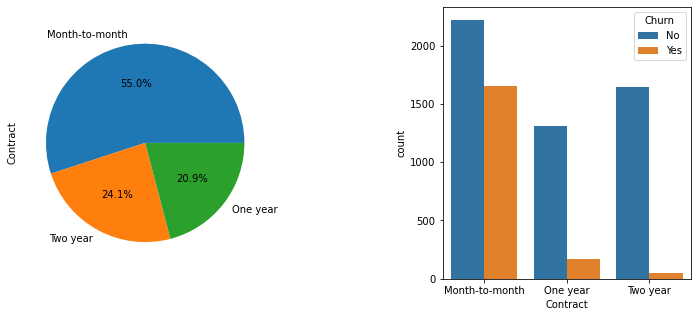

In [48]:
helper.plot_pie_and_count('Contract')

In [49]:
helper.get_p_for_chi_sq('Contract')

5.863038300673391e-258

**Observations:**
- Most of the customers pay month-to-month;
- Customers with month-to-month contract are most likely to churn. p-value for these observations is very low ($p=5.86\cdot10^{-258}$), so we can reject $H_0$ with high confidence;

Since there's a big difference in proportion of customers who churn among different contracts we'll look further into it.

In [50]:
df.groupby('Contract').describe().reset_index().MonthlyCharges

,count,mean,std,min,25%,50%,75%,max
0,3875.0,66.398490,26.926599,18.75,45.850,73.25,88.875,117.45
1,1473.0,65.048608,31.840539,18.25,26.900,68.75,94.800,118.60
2,1695.0,60.770413,34.678865,18.40,24.025,64.35,90.450,118.75


We see that on average longer the contract = lower monthly charges (and lower monthly charges are related to lower churn rate). But the difference seems to be small, so we can not yet conclude that lower churn rate for customers with longer tenure is due to lower monthly charges.

PaperlessBilling  Churn
No                No       0.836699
                  Yes      0.163301
Yes               No       0.664349
                  Yes      0.335651
Name: Churn, dtype: float64


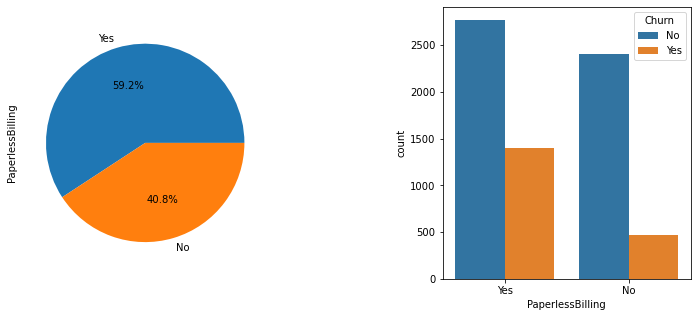

In [51]:
helper.plot_pie_and_count('PaperlessBilling')

In [52]:
helper.get_p_for_chi_sq('PaperlessBilling')

4.073354668665985e-58

**Observations:**
- Most of the customers have papaerless billing;
- Customers with paperless billing are more likely to churn. p-value for these observations is low ($p=4.07\cdot10^{-58}$), so we can reject $H_0$;

PaymentMethod              Churn
Bank transfer (automatic)  No       0.832902
                           Yes      0.167098
Credit card (automatic)    No       0.847569
                           Yes      0.152431
Electronic check           No       0.547146
                           Yes      0.452854
Mailed check               No       0.808933
                           Yes      0.191067
Name: Churn, dtype: float64


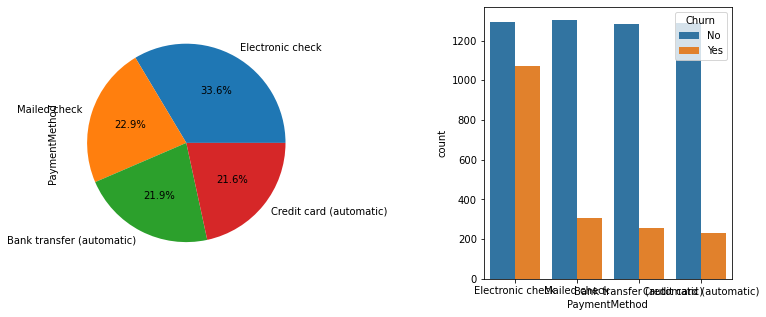

In [53]:
helper.plot_pie_and_count('PaymentMethod')

In [54]:
helper.get_p_for_chi_sq('PaymentMethod')

3.6823546520097993e-140

**Observations:**
- Most of the customers pay by electronic check;
- Only one in five customers have their checks mailed;
- Customers paying by electronic check are msot likely to churn. p-value for these observations is low($p=3.67\cdot10^{-140}$), so we can reject $H_0$

### General observation:

From analysis above it seems that in general customers with any additional internet service (TV, movies streaming, backup, etc.) are less likely to churn.

In [55]:
internet_services = ['OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in df[internet_services]: print(df[col].unique())

['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']


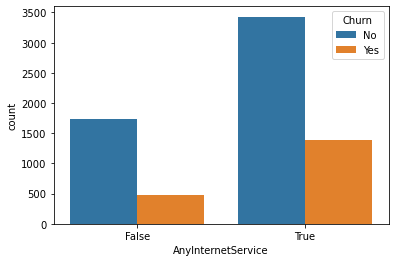

In [56]:
any_internet_service = df[internet_services].apply(lambda r: r.str.contains('Yes', case=False).any(), axis=1)
temporal_df = pd.DataFrame(list(zip(df.Churn, any_internet_service)), columns=['Churn', 'AnyInternetService'])
sns.countplot(x = temporal_df.AnyInternetService, hue = df.Churn)
plt.show()

In [57]:
temporal_df.groupby('AnyInternetService')['Churn'].value_counts(normalize=True)

AnyInternetService  Churn
False               No       0.785940
                    Yes      0.214060
True                No       0.711028
                    Yes      0.288972
Name: Churn, dtype: float64

**Observations:**
- Most of the customers have some additional internet service;
- Customers who have additional internet service are less likely to churn;

## Conclusions

Chi-squared test was used with $H_0$ - _{feature}_ is not associated with the churn rate, $\alpha=0.05$.

**Demographics:**
- Data is equally split for gender and people with and without partner;
- Most of the customers are non-senior citizens and do not have dependents;
 
**Features associated with churn (p < $\alpha$)**:
- InternetService, $p=5.54\cdot10^{-82}$), when customers without internet service are excluded $p=0.0065$. Customers with fiber optic internet service are more likely to churn;
- MultipleLines, $p=0.0035$. People with multiple lines are a bit more likely to churn;
- StreamingMovies, when customers with no internet service are excluded $p=0.0032$;
- Partner, $p=2.1\cdot10^{-36}$. Higher proportion of people without partners will churn (33% vs 20%);
- SeniorCitizen, $p=1.5\cdot10^{-36}$. Senior citizens are almost twice more likely to churn than non-senior;
- Dependents $p=4.9\cdot^{-43}$. Higher proportion of people without dependents will churn;
- PaperlessBilling, $p=4.07\cdot10^{-58}$. Customers with paperless billing are more likely to churn;
- DeviceProtection, $p=5.05\cdot10^{-122}$. People with no device protection are most likely to churn;
- OnlineBackup, $p=2.08\cdot10^{-131}$. People with no online backup are more likely to churn;
- PaymentMethod, $p=3.67\cdot10^{-140}$. Customers paying by electronic check are most likely to churn;
- TechSupport, $p=1.44\cdot10^{-180}$. People with no technical support are more likely to churn;
- OnlineSecurity, $p=2.66\cdot10^{-185}$. People with no online security are more likely to churn;
- Contract, $p=5.86\cdot10^{-258}$. Customers with month-to-month contract are most likely to churn;

**Features not associated with churn (p>$\alpha$):**
- Gender, $p = 0.486$;
- PhoneService, $p=0.34$;

**General observations:**
- Longer the customer has stayed with the company, less likely they will churn (if customer stays with the company for ~20 months they will most likely not churn);
- Higher the montly charges, more likely customers will churn (customers who pay >~65 USD will most likely churn);
- Higher total charges are accociated with longer tenure;
- Churn rate increases with monthly charges regardless of the tenure;
- On average longer the contract = lower monthly charges. But the difference seems to be small, so we can not yet conclude that lower churn rate for longer contracts is due to lower monthly charges.
- Customers who have additional internet service are less likely to churn;

# Feature engineering

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [59]:
df.drop(columns='customerID', inplace=True)

#### Outliers analysis:

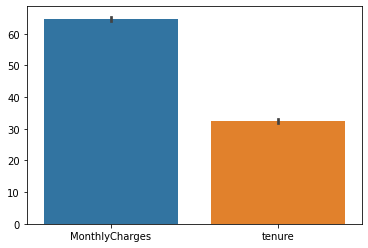

In [60]:
sns.barplot(data=df[['MonthlyCharges', 'tenure']])
plt.show()

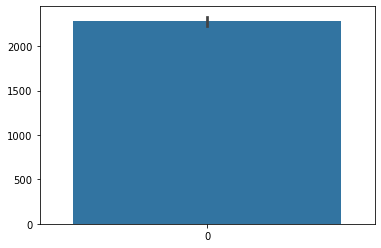

In [61]:
sns.barplot(data=df.TotalCharges)
plt.show()

There seems to be no outliers in the numerical data.

#### Numerical data correlation analysis:

In [62]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_columns].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


We already saw that tenure is highly correlated with TotalCharges. These are the only highly correlated numerical variables.

We'll drop total charges column from the data.

In [63]:
df.drop(columns='TotalCharges', inplace=True)

#### Categorical data correlation analysis:

In [64]:
df.Churn.replace({"Yes":1, "No":0}, inplace = True)

In [65]:
dummy_df = pd.get_dummies(df)
dummy_df

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


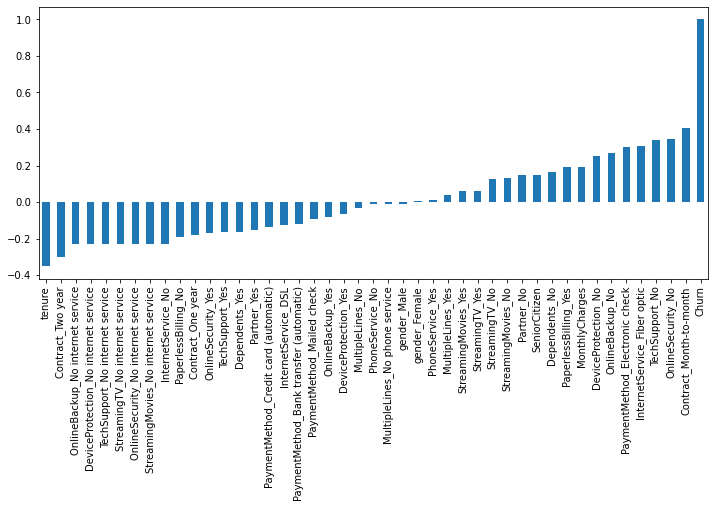

In [66]:
dummy_df.corr()['Churn'].sort_values(ascending=True).plot(kind='bar', figsize=figsize)
plt.show()

Correlation plot confirms our observations we got using chi-squared test - _gender_ and _PhoneService_ seems to have almost no impact on the churn rate so we'll remove those variables.

In [67]:
dummy_df.drop(columns=['gender_Male', 'gender_Female', 'PhoneService_Yes', 'PhoneService_No'], inplace=True)
dummy_df.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,1,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


So far we checked for correlation between churn and all the other variables, but we also want to check for correlation between other variables as well.

**Categorical values:**

In [68]:
categorical_columns = df.columns.difference(numerical_columns)

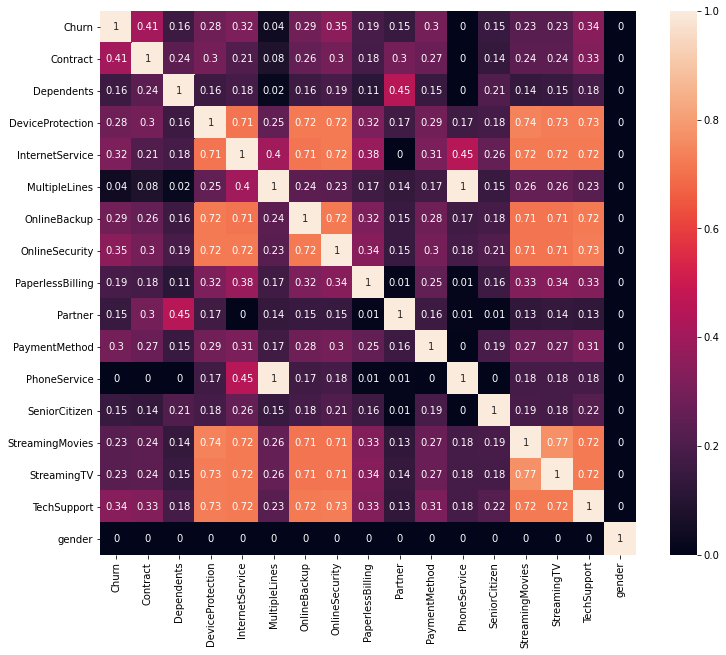

In [69]:
categorical_df = df[categorical_columns]
rows = []

for var1 in categorical_df:
  col = []
  for var2 in categorical_df :
    cramers = helper.cramers_v(categorical_df[var1], categorical_df[var2]) # Cramer's V test
    col.append(round(cramers,2))
  rows.append(col)
  
cramers_results = np.array(rows)
cramers_corr = pd.DataFrame(cramers_results, columns = categorical_df.columns, index =categorical_df.columns)

plt.figure(figsize = (12,10))
sns.heatmap(cramers_corr, annot=True)
plt.show()

It seems than no other variables are correlated strongly enough to remove any of them.

Next we'll check for the missing values.

In [70]:
dummy_df.isna().sum()

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
Churn                                      0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProtection_No internet service       0
DeviceProt

Lucky us - no missing values.

# Fitting logistic regression

In [71]:
X = dummy_df.drop(columns=['Churn'])
y = dummy_df.Churn

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [73]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [74]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [75]:
residuals = np.abs(y_train, y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize = True))

0    3868
1    1414
Name: Churn, dtype: int64
0    0.732298
1    0.267702
Name: Churn, dtype: float64
